In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

font = {'family' : 'normal',
        'weight' : 'bold',
        'size': 16}
plt.rc('font', **font)

## Task 1

In [2]:
class Filter_banks():
    def __init__(self, x, N=512):
        self.x = x
        self.N = N
        self.n = np.arange(2*N)
        self.h_k = np.zeros((N, 2*N))
        self.g_k = np.zeros((N, 2*N))
        self.y1 = np.zeros((N, len(x)))
        self.y2 = np.zeros((N, len(x)//512))
        self.s = N - 1  # (N-1) is identical to mode="same"

    def analysis(self):
        # filter and downsample
        self.h_n = np.sin(np.pi*(self.n + 0.5) /2 /self.N) * np.sqrt(2/self.N)
        for k in range(self.N):
            self.g_k[k, :] = self.h_n * np.cos(np.pi*(k+0.5)*(self.n+0.5-0.5*self.N) /self.N)
            self.h_k[k, :] = self.g_k[k, ::-1]
            self.y1[k, :] = signal.convolve(x, self.h_k[k, :], mode="full")[self.s:len(x)+self.s]  # filtering
            self.y2[k, :] = self.y1[k, k::self.N]                                 # downsampling

    def synthesis(self):
        # restore
        self.y3 = np.zeros((self.N, len(self.x)))
        self.y4 = np.zeros((self.N, len(self.x)))
        for k in range(self.N):
            self.y3[k, k::self.N] = self.y2[k, :]                                            # upsampling
            self.y4[k, :] = signal.convolve(self.y3[k, :], self.g_k[k, :], mode="full")[self.s:len(x)+self.s] # filtering
        self.x_hat = self.y4.sum(0)
        return self.x_hat

## Task2

In [3]:
x = 0.001 * np.arange(5120)
fb = Filter_banks(x, 512)
fb.analysis()
x_hat = fb.synthesis()

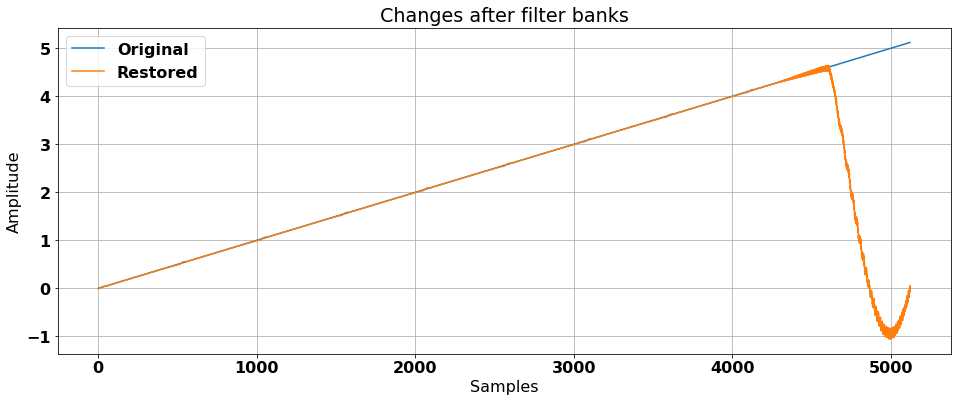

In [5]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot()
ax.plot(x)
ax.plot(x_hat)
plt.title("Changes after filter banks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(['Original', 'Restored'])
plt.grid()
plt.show()

Original and restored signals are mostly original. But there is strong distortion on the boundaries of signal. 

## Task 3

In [6]:
from scipy.io import wavfile
audiofile = "Track16.wav"

fs, data = wavfile.read(audiofile)

In [7]:
start = 10_000
duration = 5120 # in samples
x = data[start:start+duration, 0]

fb = Filter_banks(x, 512)
fb.analysis()
x_hat = fb.synthesis()

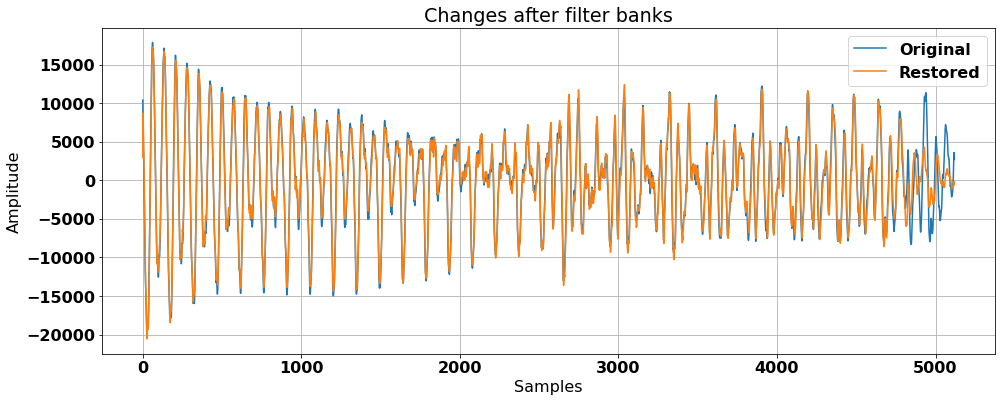

In [8]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot()
ax.plot(x)
ax.plot(x_hat)
plt.title("Changes after filter banks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend(['Original', 'Restored'])
plt.grid()
plt.show()

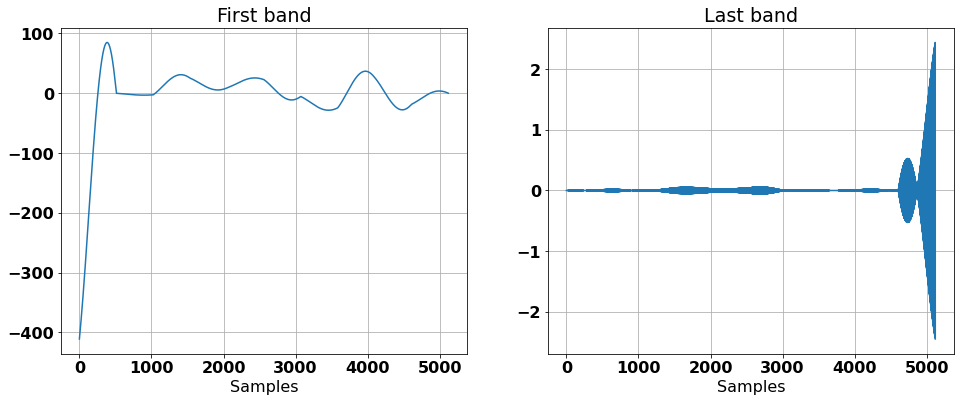

In [12]:
sb_first = fb.y4[0, :]
sb_last = fb.y4[-1, :]

fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(121) 
ax.plot(sb_first)
plt.title("First band")
plt.xlabel("Samples")
plt.grid()

ax = fig.add_subplot(122) 
plt.grid()
plt.title("Last band")
plt.xlabel("Samples")
ax.plot(sb_last)

plt.show()